Каирова Екатерина ТФэ-01-21
Домашняя работа 1
Задача 1

Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара: 
 = 5, 10, 15, 20 MPa. Для каждого значения взять следующие значения температуры 
 = 300, 350, 400, 450, 500 градусов Цельсия, 
 = 5 kPa. Принять давление за последней ступенью паровой турбины 
 = 
. Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.

In [2]:
import iapws
from iapws import IAPWS97 as gas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa 
to_kelvin = lambda x: x + 273.15 if x else None

In [5]:
p_0 = np.array([5,10,15,20]) * MPa
t_0 = np.array([300, 350, 400, 450, 500])+273.15
p_k = 5 * kPa
p_2 = p_k
print(p_0, t_0)

[ 5000000 10000000 15000000 20000000] [573.15 623.15 673.15 723.15 773.15]


In [6]:
i=0
j=0
h_0 = []
s_0 = []
while i<len(p_0):
    while j<len(t_0):
        point_0 = gas(P=p_0[i] * unit, T=t_0[j])
        h_0 = np.append(h_0,point_0.h)
        s_0 = np.append(s_0,point_0.s)
        j=j+1
    i=i+1
    j=j*0
print (h_0)

[2925.64404236 3069.29417488 3196.59167018 3317.03197537 3434.47609664
 1343.09660906 2923.95784687 3097.37527449 3242.27794968 3375.05844185
 1338.06326095 2692.99981541 2975.5476758  3157.84152051 3310.79107252
 1334.13952503 1645.95105148 2816.83619758 3061.534314   3241.186528  ]


In [8]:
i=0
h_condenser_inlet = []
while i<len(s_0):
    point_condenser_inlet = gas(P= p_k * unit, s=s_0[i])
    i=i+1
    h_condenser_inlet = np.append(h_condenser_inlet,point_condenser_inlet.h )
print (h_condenser_inlet)

[1892.72102528 1966.34712795 2026.51095941 2079.33842268 2127.40013146
  986.10004442 1811.5803903  1893.63558132 1957.22403461 2011.57556534
  979.70734054 1657.86438063 1791.95467235 1872.01124891 1934.63938192
  973.9562354  1133.13956716 1691.21226626 1798.80971023 1872.4034713 ]


In [9]:
point_pump_outlet = gas(P=p_k * unit, x=0)
h_pump_outlet=point_pump_outlet.h

In [10]:
useful_energy = h_0 - h_condenser_inlet
full_energy = h_0 - h_pump_outlet
efficiency = useful_energy / full_energy


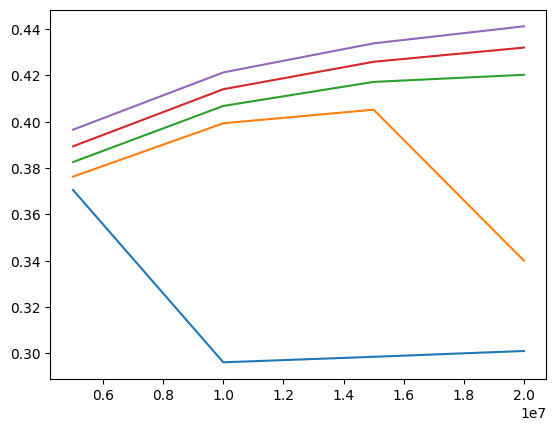

In [11]:
fig, ax = plt.subplots()
ax.plot(p_0,efficiency[[0,5,10,15]])
ax.plot(p_0,efficiency[[1,6,11,16]])
ax.plot(p_0,efficiency[[2,7,12,17]])
ax.plot(p_0,efficiency[[3,8,13,18]])
ax.plot(p_0,efficiency[[4,9,14,19]])